# Machine learning-based prediction of COVID-19 diagnosis based on symptoms

In [ ]:
import pandas as pd

df_original = pd.read_csv('covid19dataset.csv')
df_original.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,30/04/20,0,0,0,0,0,negative,None,female,Other
1,30/04/20,1,0,0,0,0,negative,None,female,Other
2,30/04/20,0,1,0,0,0,negative,None,male,Other
3,30/04/20,1,0,0,0,0,negative,None,female,Other
4,30/04/20,1,0,0,0,0,negative,None,male,Other


In [ ]:
df_original

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,30/04/20,0,0,0,0,0,negative,None,female,Other
1,30/04/20,1,0,0,0,0,negative,None,female,Other
2,30/04/20,0,1,0,0,0,negative,None,male,Other
3,30/04/20,1,0,0,0,0,negative,None,female,Other
4,30/04/20,1,0,0,0,0,negative,None,male,Other
...,...,...,...,...,...,...,...,...,...,...
278843,11/03/20,0,0,0,0,0,negative,None,None,Other
278844,11/03/20,0,0,0,0,0,negative,None,None,Other
278845,11/03/20,0,0,0,0,0,positive,None,None,Contact with confirmed
278846,11/03/20,0,0,0,0,0,other,None,None,Other


In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


In [ ]:
df_original.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [ ]:
df_original = df_original.drop(df_original.index[df_original['cough'] == 'None'])
df_original = df_original.drop(df_original.index[df_original['fever'] == 'None'])
df_original = df_original.drop(df_original.index[df_original['sore_throat'] == 'None'])
df_original = df_original.drop(df_original.index[df_original['shortness_of_breath'] == 'None'])
df_original = df_original.drop(df_original.index[df_original['head_ache'] == 'None'])
df_original = df_original.drop(df_original.index[df_original['shortness_of_breath'] == 'None'])
df_original = df_original.drop(df_original.index[df_original['corona_result'] == 'other'])

df_original

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,30/04/20,0,0,0,0,0,negative,None,female,Other
1,30/04/20,1,0,0,0,0,negative,None,female,Other
2,30/04/20,0,1,0,0,0,negative,None,male,Other
3,30/04/20,1,0,0,0,0,negative,None,female,Other
4,30/04/20,1,0,0,0,0,negative,None,male,Other
...,...,...,...,...,...,...,...,...,...,...
278842,11/03/20,0,0,0,0,0,negative,None,None,Other
278843,11/03/20,0,0,0,0,0,negative,None,None,Other
278844,11/03/20,0,0,0,0,0,negative,None,None,Other
278845,11/03/20,0,0,0,0,0,positive,None,None,Contact with confirmed


In [ ]:
df_original['cough'] = df_original['cough'].astype(float)
df_original['fever'] = df_original['fever'].astype(float)
df_original['sore_throat'] = df_original['sore_throat'].astype(float)
df_original['shortness_of_breath'] = df_original['shortness_of_breath'].astype(float)
df_original['head_ache'] = df_original['head_ache'].astype(float)

In [ ]:
df_original['coronaresult'] = df_original['corona_result'].map({'positive':1, 'negative':0, 'other':2, 'None': 3})
df_original

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,coronaresult
0,30/04/20,0.0,0.0,0.0,0.0,0.0,negative,None,female,Other,0
1,30/04/20,1.0,0.0,0.0,0.0,0.0,negative,None,female,Other,0
2,30/04/20,0.0,1.0,0.0,0.0,0.0,negative,None,male,Other,0
3,30/04/20,1.0,0.0,0.0,0.0,0.0,negative,None,female,Other,0
4,30/04/20,1.0,0.0,0.0,0.0,0.0,negative,None,male,Other,0
...,...,...,...,...,...,...,...,...,...,...,...
278842,11/03/20,0.0,0.0,0.0,0.0,0.0,negative,None,None,Other,0
278843,11/03/20,0.0,0.0,0.0,0.0,0.0,negative,None,None,Other,0
278844,11/03/20,0.0,0.0,0.0,0.0,0.0,negative,None,None,Other,0
278845,11/03/20,0.0,0.0,0.0,0.0,0.0,positive,None,None,Contact with confirmed,1


In [ ]:
df_original['age60andabove'] = df_original['age_60_and_above'].map({'Yes': 1, 'No':0, 'None':2})
df_original

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,coronaresult,age60andabove
0,30/04/20,0.0,0.0,0.0,0.0,0.0,negative,None,female,Other,0,2
1,30/04/20,1.0,0.0,0.0,0.0,0.0,negative,None,female,Other,0,2
2,30/04/20,0.0,1.0,0.0,0.0,0.0,negative,None,male,Other,0,2
3,30/04/20,1.0,0.0,0.0,0.0,0.0,negative,None,female,Other,0,2
4,30/04/20,1.0,0.0,0.0,0.0,0.0,negative,None,male,Other,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
278842,11/03/20,0.0,0.0,0.0,0.0,0.0,negative,None,None,Other,0,2
278843,11/03/20,0.0,0.0,0.0,0.0,0.0,negative,None,None,Other,0,2
278844,11/03/20,0.0,0.0,0.0,0.0,0.0,negative,None,None,Other,0,2
278845,11/03/20,0.0,0.0,0.0,0.0,0.0,positive,None,None,Contact with confirmed,1,2


In [ ]:
df_original['Gender'] = df_original['gender'].map({'female':1,'male':0, 'None':2})
df_original

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,coronaresult,age60andabove,Gender
0,30/04/20,0.0,0.0,0.0,0.0,0.0,negative,None,female,Other,0,2,1
1,30/04/20,1.0,0.0,0.0,0.0,0.0,negative,None,female,Other,0,2,1
2,30/04/20,0.0,1.0,0.0,0.0,0.0,negative,None,male,Other,0,2,0
3,30/04/20,1.0,0.0,0.0,0.0,0.0,negative,None,female,Other,0,2,1
4,30/04/20,1.0,0.0,0.0,0.0,0.0,negative,None,male,Other,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278842,11/03/20,0.0,0.0,0.0,0.0,0.0,negative,None,None,Other,0,2,2
278843,11/03/20,0.0,0.0,0.0,0.0,0.0,negative,None,None,Other,0,2,2
278844,11/03/20,0.0,0.0,0.0,0.0,0.0,negative,None,None,Other,0,2,2
278845,11/03/20,0.0,0.0,0.0,0.0,0.0,positive,None,None,Contact with confirmed,1,2,2


In [ ]:
df_original['testindication'] = df_original['test_indication'].map({'Contact with confirmed': 1, 'Other':2, 'Abroad':3, 'None': 4})
df_original

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,coronaresult,age60andabove,Gender,testindication
0,30/04/20,0.0,0.0,0.0,0.0,0.0,negative,None,female,Other,0,2,1,2
1,30/04/20,1.0,0.0,0.0,0.0,0.0,negative,None,female,Other,0,2,1,2
2,30/04/20,0.0,1.0,0.0,0.0,0.0,negative,None,male,Other,0,2,0,2
3,30/04/20,1.0,0.0,0.0,0.0,0.0,negative,None,female,Other,0,2,1,2
4,30/04/20,1.0,0.0,0.0,0.0,0.0,negative,None,male,Other,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278842,11/03/20,0.0,0.0,0.0,0.0,0.0,negative,None,None,Other,0,2,2,2
278843,11/03/20,0.0,0.0,0.0,0.0,0.0,negative,None,None,Other,0,2,2,2
278844,11/03/20,0.0,0.0,0.0,0.0,0.0,negative,None,None,Other,0,2,2,2
278845,11/03/20,0.0,0.0,0.0,0.0,0.0,positive,None,None,Contact with confirmed,1,2,2,1


In [ ]:
import numpy as np

## Data Standardisation :

Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data.

In [ ]:
feature_df = df_original[['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache']]
X = np.asarray(feature_df)
X[0:5]

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
df_original['coronaresult'] = df_original['coronaresult'].astype('int')
y = np.asarray(df_original['coronaresult'])
y[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### Training / Testing Dataset :

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (219761, 5) (219761,)
Test set: (54941, 5) (54941,)


## 1.) Logistic Regression Algorithm :

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.3, solver='liblinear', max_iter=25000).fit(X_train,y_train)
LR
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9567120644700379
Test set Accuracy:  0.9575180648331847


In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.94371414, 0.05628586],
       [0.94371414, 0.05628586],
       [0.97227363, 0.02772637],
       ...,
       [0.97227363, 0.02772637],
       [0.97227363, 0.02772637],
       [0.97227363, 0.02772637]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[  671  2210]
 [  124 51936]]


Confusion matrix, without normalization
[[  671  2210]
 [  124 51936]]


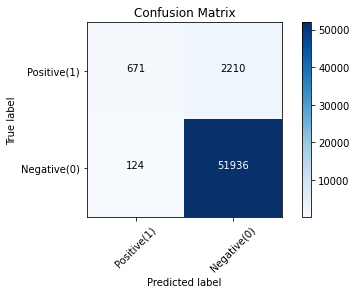

In [ ]:
# Computing confusion matrix :
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix :
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Positive(1)','Negative(0)'],normalize= False,  title='Confusion Matrix')

In [ ]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     52060
           1       0.84      0.23      0.37      2881

    accuracy                           0.96     54941
   macro avg       0.90      0.62      0.67     54941
weighted avg       0.95      0.96      0.95     54941



In [ ]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TP / float(TP + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [ ]:
confusion_metrics(cnf_matrix)

True Positives: 51936
True Negatives: 671
False Positives: 2210
False Negatives: 124
--------------------------------------------------
Accuracy: 0.96
Mis-Classification: 0.04
Sensitivity: 1.0
Specificity: 0.23
Precision: 0.96
f_1 Score: 0.98


### log loss :

In logistic regression, the output can be the probability of malignant cell is yes (or equals to 1). This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.15841363055971563

## AUC-ROC Curve implementation for Logistic Regression:

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
LR_auc_roc = LR.predict_proba(X_test)

In [ ]:
LR_probs_auc_roc = LR_auc_roc[:, 1]

In [ ]:
auc_LR = roc_auc_score(y_test, LR_probs_auc_roc)
print('AUC: %.3f' % auc_LR)

AUC: 0.774


In [ ]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, LR_probs_auc_roc)

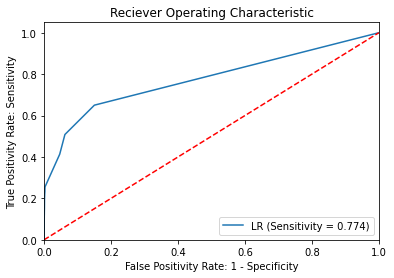

In [ ]:
plt.figure()
plt.plot(fpr_lr, tpr_lr, label='LR (Sensitivity = %0.3f)' % auc_LR)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positivity Rate: 1 - Specificity')
plt.ylabel('True Positivity Rate: Sensitivity')
plt.title('Reciever Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('LR_AUC-ROC')
plt.show()

In [ ]:
threshold_lr_median = np.median(thresholds_lr)
print(threshold_lr_median)

0.9667669180759687


In [ ]:
y_pred_LR = LR.predict_proba(X_test)[:,1]
y_pred_LR = y_pred_LR.reshape(1 ,-1)
y_pred_LR

array([[0.06, 0.06, 0.03, ..., 0.03, 0.03, 0.03]])

In [ ]:
from sklearn.preprocessing import binarize

y_pred_Class_LR = binarize(y_pred_LR, threshold = threshold_lr_median)[0]
y_pred_Class_LR 

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_pred_Class_LR = y_pred_Class_LR.astype(int)
y_pred_Class_LR

array([0, 0, 0, ..., 0, 0, 0])

Confusion matrix, without normalization
[[  271  2610]
 [   24 52036]]


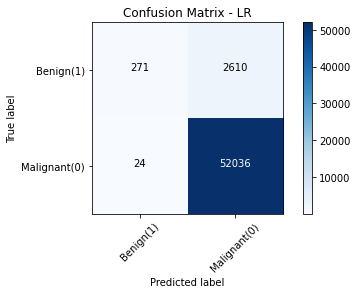

In [ ]:
# Computing confusion matrix :
cnf_matrix = confusion_matrix(y_test, y_pred_Class_LR, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix :
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(1)','Malignant(0)'],normalize= False,  title='Confusion Matrix - LR')

In [ ]:
print (classification_report(y_test, y_pred_Class_LR))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     52060
           1       0.92      0.09      0.17      2881

    accuracy                           0.95     54941
   macro avg       0.94      0.55      0.57     54941
weighted avg       0.95      0.95      0.93     54941



In [ ]:
confusion_metrics(cnf_matrix)

True Positives: 52036
True Negatives: 271
False Positives: 2610
False Negatives: 24
--------------------------------------------------
Accuracy: 0.95
Mis-Classification: 0.05
Sensitivity: 1.0
Specificity: 0.09
Precision: 0.95
f_1 Score: 0.98


## 2.) Random Forest Classifier

In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.9582


Confusion matrix, without normalization
[[  737  2144]
 [  152 51908]]


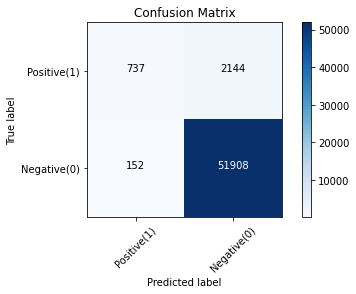

In [ ]:
# Computing confusion matrix :
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix :
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Positive(1)','Negative(0)'],normalize= False,  title='Confusion Matrix')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     52060
           1       0.83      0.26      0.39      2881

    accuracy                           0.96     54941
   macro avg       0.89      0.63      0.68     54941
weighted avg       0.95      0.96      0.95     54941



## AUC-ROC Curve implementation for Random Forest Classifier: 

In [ ]:
rfc_probs = rfc.predict_proba(X_test)
rfc_probs = rfc_probs[:, 1]

In [ ]:
auc_rfc = roc_auc_score(y_test, rfc_probs)
print('AUC: %.3f' % auc_rfc)

AUC: 0.776


In [ ]:
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, rfc_probs)

In [ ]:
threshold_rfc_median = np.median(thresholds_rfc)
print(threshold_rfc_median)

0.8331488395977955


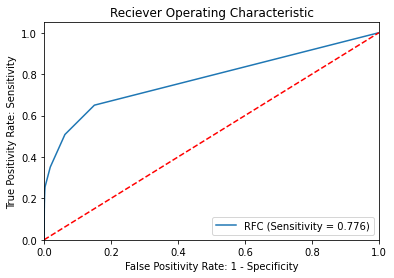

In [ ]:
plt.figure()
plt.plot(fpr_rfc, tpr_rfc, label='RFC (Sensitivity = %0.3f)' % auc_rfc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positivity Rate: 1 - Specificity')
plt.ylabel('True Positivity Rate: Sensitivity')
plt.title('Reciever Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('RFC_AUC-ROC')
plt.show()

In [ ]:
y_pred_RFC = rfc.predict_proba(X_test)[:,1]
y_pred_RFC = y_pred_RFC.reshape(1 ,-1)
y_pred_RFC

array([[0.09, 0.09, 0.02, ..., 0.02, 0.02, 0.02]])

In [ ]:
from sklearn.preprocessing import binarize

y_pred_Class_RFC = binarize(y_pred_RFC, threshold = threshold_rfc_median)[0]
y_pred_Class_RFC

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_pred_Class_RFC = y_pred_Class_RFC.astype(int)
y_pred_Class_RFC

array([0, 0, 0, ..., 0, 0, 0])

Confusion matrix, without normalization
[[  447  2434]
 [   40 52020]]


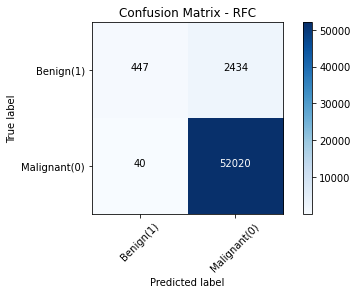

In [ ]:
# Computing confusion matrix :
cnf_matrix = confusion_matrix(y_test, y_pred_Class_RFC, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix :
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(1)','Malignant(0)'],normalize= False,  title='Confusion Matrix - RFC')

In [ ]:
print (classification_report(y_test, y_pred_Class_RFC))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     52060
           1       0.92      0.16      0.27      2881

    accuracy                           0.95     54941
   macro avg       0.94      0.58      0.62     54941
weighted avg       0.95      0.95      0.94     54941



In [ ]:
confusion_metrics(cnf_matrix)

True Positives: 52020
True Negatives: 447
False Positives: 2434
False Negatives: 40
--------------------------------------------------
Accuracy: 0.95
Mis-Classification: 0.05
Sensitivity: 1.0
Specificity: 0.16
Precision: 0.96
f_1 Score: 0.98


## 3.) Extreme Gradient Boosting: 

In [ ]:
from xgboost import XGBClassifier

m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)

print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[52016    44]
 [ 2646   235]]


Accuracy of Extreme Gradient Boost: 95.10383866329335 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     52060
           1       0.84      0.08      0.15      2881

    accuracy                           0.95     54941
   macro avg       0.90      0.54      0.56     54941
weighted avg       0.95      0.95      0.93     54941



## AUC-ROC Curve implementation for Extreme Gradient Boosting:

In [ ]:
xgb_probs = xgb.predict_proba(X_test)
xgb_probs = xgb_probs[:, 1]

In [ ]:
auc_rfc = roc_auc_score(y_test, xgb_probs)
print('AUC: %.3f' % auc_rfc)

AUC: 0.774


In [ ]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_probs)

In [ ]:
threshold_xgb_median = np.median(thresholds_xgb)
print(threshold_xgb_median)

0.50197136


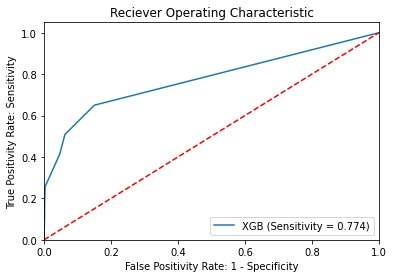

In [ ]:
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label='XGB (Sensitivity = %0.3f)' % auc_rfc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positivity Rate: 1 - Specificity')
plt.ylabel('True Positivity Rate: Sensitivity')
plt.title('Reciever Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_AUC-ROC')
plt.show()

In [ ]:
y_pred_XGB = xgb.predict_proba(X_test)[:,1]
y_pred_XGB = y_pred_XGB.reshape(1 ,-1)
y_pred_XGB

array([[0.41, 0.41, 0.4 , ..., 0.4 , 0.4 , 0.4 ]], dtype=float32)

In [ ]:
from sklearn.preprocessing import binarize

y_pred_Class_XGB = binarize(y_pred_XGB, threshold = threshold_xgb_median)[0]
y_pred_Class_XGB

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
y_pred_Class_XGB = y_pred_Class_XGB.astype(int)
y_pred_Class_XGB

array([0, 0, 0, ..., 0, 0, 0])

Confusion matrix, without normalization
[[  203  2678]
 [   44 52016]]


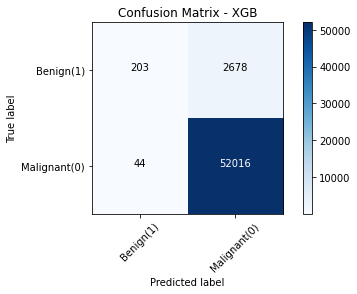

In [ ]:
# Computing confusion matrix :
cnf_matrix = confusion_matrix(y_test, y_pred_Class_XGB, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix :
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(1)','Malignant(0)'],normalize= False,  title='Confusion Matrix - XGB')

In [ ]:
print (classification_report(y_test, y_pred_Class_XGB))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     52060
           1       0.82      0.07      0.13      2881

    accuracy                           0.95     54941
   macro avg       0.89      0.53      0.55     54941
weighted avg       0.94      0.95      0.93     54941



In [ ]:
confusion_metrics(cnf_matrix)

True Positives: 52016
True Negatives: 203
False Positives: 2678
False Negatives: 44
--------------------------------------------------
Accuracy: 0.95
Mis-Classification: 0.05
Sensitivity: 1.0
Specificity: 0.07
Precision: 0.95
f_1 Score: 0.97


## 4.) K-Nearest Neighbors:

In [ ]:
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Training: Lets start the algorithm with k=7 for now:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=7)

In [ ]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.957003289937705
Test set Accuracy:  0.9576818769225168


In [ ]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.95, 0.95, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96,
       0.96, 0.96, 0.96])

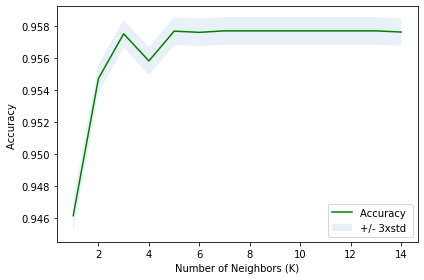

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9576818769225168 with k= 7


Confusion matrix, without normalization
[[  669  2212]
 [  117 51943]]


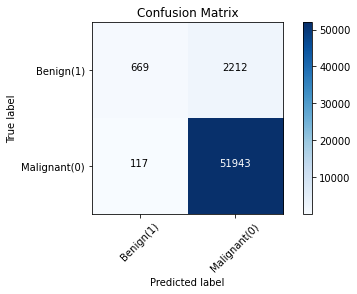

In [ ]:
# Computing confusion matrix :
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix :
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(1)','Malignant(0)'],normalize= False,  title='Confusion Matrix')

In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     52060
           1       0.85      0.23      0.36      2881

    accuracy                           0.96     54941
   macro avg       0.91      0.61      0.67     54941
weighted avg       0.95      0.96      0.95     54941



In [ ]:
confusion_metrics(cnf_matrix)

True Positives: 51943
True Negatives: 669
False Positives: 2212
False Negatives: 117
--------------------------------------------------
Accuracy: 0.96
Mis-Classification: 0.04
Sensitivity: 1.0
Specificity: 0.23
Precision: 0.96
f_1 Score: 0.98


In [ ]:
neigh.score(X_test,y_test)
neigh = neigh.predict_proba(X_test)[:,1]

## AUC-ROC Curve implementation for K-Nearest Neighbors:

In [ ]:
auc_knn = roc_auc_score(y_test, neigh)
print('AUC: %.3f' % auc_knn)

AUC: 0.776


In [ ]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, neigh)

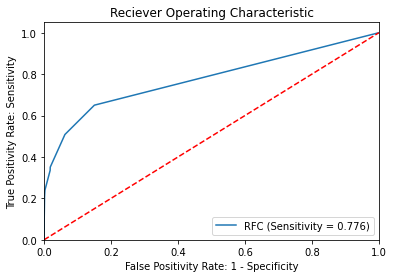

In [ ]:
plt.figure()
plt.plot(fpr_knn, tpr_knn, label='RFC (Sensitivity = %0.3f)' % auc_knn)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positivity Rate: 1 - Specificity')
plt.ylabel('True Positivity Rate: Sensitivity')
plt.title('Reciever Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_AUC-ROC')
plt.show()

In [ ]:
threshold_knn_median = np.median(thresholds_knn)
print(threshold_knn_median)

0.6428571428571429


In [ ]:
y_pred_neigh = neigh.reshape(1 ,-1)
y_pred_neigh

array([[0.07, 0.07, 0.  , ..., 0.  , 0.  , 0.  ]])

In [ ]:
from sklearn.preprocessing import binarize

y_pred_neigh = binarize(y_pred_neigh, threshold = threshold_knn_median)[0]
y_pred_neigh

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_pred_neigh = y_pred_neigh.astype(int)
y_pred_neigh

array([0, 0, 0, ..., 0, 0, 0])

Confusion matrix, without normalization
[[  650  2231]
 [  105 51955]]


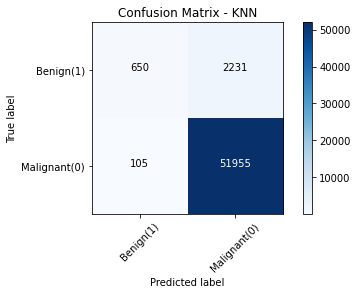

In [ ]:
# Computing confusion matrix :
cnf_matrix = confusion_matrix(y_test, y_pred_neigh, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix :
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(1)','Malignant(0)'],normalize= False,  title='Confusion Matrix - KNN')

In [ ]:
print (classification_report(y_test, y_pred_neigh))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     52060
           1       0.86      0.23      0.36      2881

    accuracy                           0.96     54941
   macro avg       0.91      0.61      0.67     54941
weighted avg       0.95      0.96      0.95     54941



In [ ]:
confusion_metrics(cnf_matrix)

True Positives: 51955
True Negatives: 650
False Positives: 2231
False Negatives: 105
--------------------------------------------------
Accuracy: 0.96
Mis-Classification: 0.04
Sensitivity: 1.0
Specificity: 0.23
Precision: 0.96
f_1 Score: 0.98


## 5.) Support Vector Machine: 

##### Modeling (SVM with Scikit-learn) :
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear

2.Polynomial

3.Radial basis function (RBF)

4.Sigmoid

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. 

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import StratifiedKFold

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9582097158770317


In [ ]:
svc=SVC(kernel='linear') ##linear kernel
svc.fit(X_train,y_train)
y_pred_linear=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred_linear))

Accuracy Score:
0.9582097158770317


In [ ]:
svc=SVC(kernel='rbf') ##rbf kernel
svc.fit(X_train,y_train)
y_pred_rbf=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred_rbf))

Accuracy Score:
0.9582097158770317


In [ ]:
svc=SVC(kernel='poly') #polynomial kernel
svc.fit(X_train,y_train)
y_pred_poly=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred_poly))

Accuracy Score:
0.9582097158770317


In [ ]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear') #linear kernel
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())

[0.95 0.95 0.95 0.96 0.96 0.96 0.97 0.96 0.97 0.95]
0.9574776369724874


In [ ]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf') ##rbf kernel
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())

[0.95 0.95 0.95 0.96 0.96 0.96 0.97 0.96 0.97 0.95]
0.9574776369724874


In [ ]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='poly') #polynomial kernel
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())

[0.95 0.95 0.95 0.96 0.96 0.96 0.97 0.96 0.97 0.95]
0.9574776369724874


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     52060
           1       0.83      0.26      0.39      2881

    accuracy                           0.96     54941
   macro avg       0.89      0.63      0.68     54941
weighted avg       0.95      0.96      0.95     54941

Confusion matrix, without normalization
[[  737  2144]
 [  152 51908]]


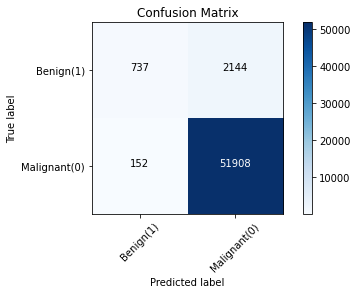

In [ ]:
# Computing confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_linear, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred_linear))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(1)','Malignant(0)'],normalize= False,  title='Confusion Matrix')

In [ ]:
confusion_metrics(cnf_matrix)

True Positives: 51908
True Negatives: 737
False Positives: 2144
False Negatives: 152
--------------------------------------------------
Accuracy: 0.96
Mis-Classification: 0.04
Sensitivity: 1.0
Specificity: 0.26
Precision: 0.96
f_1 Score: 0.98


## AUC-ROC Curve implementation for SVM Algorithm:

In [ ]:
svm_auc=SVC(kernel='linear', probability=True)
svm_auc.fit(X_train,y_train)
svm_auc.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
svm_auc = svm_auc.predict_proba(X_test)

In [ ]:
probs_svm_auc = svm_auc[:, 1]

In [ ]:
auc_svm = roc_auc_score(y_test, probs_svm_auc)
print('AUC: %.3f' % auc_svm)

AUC: 0.768


In [ ]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, probs_svm_auc)

In [ ]:
threshold_svm_median = np.median(thresholds_svm)
print(threshold_svm_median)

0.9949807699917945


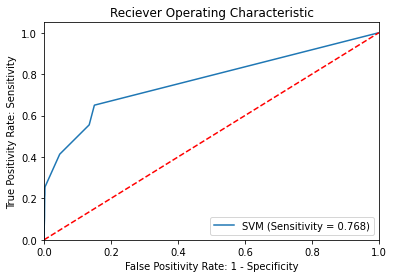

In [ ]:
plt.figure()
plt.plot(fpr_svm, tpr_svm, label='SVM (Sensitivity = %0.3f)' % auc_svm)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positivity Rate: 1 - Specificity')
plt.ylabel('True Positivity Rate: Sensitivity')
plt.title('Reciever Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_AUC-ROC')
plt.show()

In [ ]:
svm_auc = svm_auc.reshape(1 ,-1)
svm_auc

array([[0.96, 0.04, 0.96, ..., 0.04, 0.96, 0.04]])

In [ ]:
from sklearn.preprocessing import binarize

svm_auc = binarize(svm_auc, threshold = threshold_svm_median)[0]
svm_auc

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
svm_auc = svm_auc.astype(int)
svm_auc

array([0, 0, 0, ..., 0, 0, 0])

## 6.) Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred_gnb = gnb.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred_gnb)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_gnb)*100)

Gaussian Naive Bayes model accuracy(in %): 95.82097158770317


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     52060
           1       0.83      0.26      0.39      2881

    accuracy                           0.96     54941
   macro avg       0.89      0.63      0.68     54941
weighted avg       0.95      0.96      0.95     54941

Confusion matrix, without normalization
[[  737  2144]
 [  152 51908]]


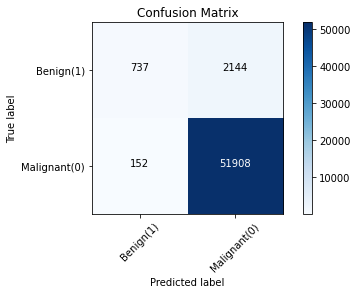

In [ ]:
# Computing confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_gnb, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred_gnb))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(1)','Malignant(0)'],normalize= False,  title='Confusion Matrix')